###### Import Libraries

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('../Data/Processed.csv')

###### Baseline Model

In [11]:
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input.   
def prepare_model_smote(df,class_col,cols_to_exclude):
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [12]:
#for Logistics Regression
def run_model(X_train,X_test,y_train,y_test):
  global logreg #Defines the logistic model as a global model that can be used outside of this function
  ##Fitting the logistic regression
  logreg = LogisticRegression(random_state = 13)
  logreg.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = logreg.predict(X_test)
  logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%logit_roc_auc)
    
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.96      0.74      0.84       513
         1.0       0.27      0.76      0.40        63

    accuracy                           0.75       576
   macro avg       0.62      0.75      0.62       576
weighted avg       0.89      0.75      0.79       576

The area under the curve is: 0.75


###### Decision Tree

In [13]:
#Synthetic Minority Oversampling Technique. Generates new instances from existing minority cases that you supply as input
def prepare_model_smote(df,class_col,cols_to_exclude):
  cols=df.select_dtypes(include=np.number).columns.tolist() 
  X=df[cols]
  X = X[X.columns.difference([class_col])]
  X = X[X.columns.difference(cols_to_exclude)]
  y=df[class_col]
  global X_train, X_test, y_train, y_test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
  sm = SMOTE(random_state=0, sampling_strategy=1.0)
  X_train, y_train = sm.fit_resample(X_train, y_train) 

In [14]:
def run_model(X_train,X_test,y_train,y_test):
  global dectree #Defines the decision tree model as a global model that can be used outside of this function
  ##Fitting the decision tree model
  dectree = DecisionTreeClassifier(random_state = 13,criterion = 'entropy')
  dectree.fit(X_train, y_train)
  ##Predicting y values
  global y_pred #Defines the Y_Pred as a global variable that can be used outside of this function
  y_pred = dectree.predict(X_test)
  dectree_roc_auc = roc_auc_score(y_test, dectree.predict(X_test))
  print(classification_report(y_test, y_pred))
  print("The area under the curve is: %0.2f"%dectree_roc_auc)

In [15]:
prepare_model_smote(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [16]:
run_model(X_train,X_test,y_train,y_test)

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       513
         1.0       0.41      0.62      0.49        63

    accuracy                           0.86       576
   macro avg       0.68      0.75      0.71       576
weighted avg       0.89      0.86      0.87       576

The area under the curve is: 0.75


###### plot_roc_curve

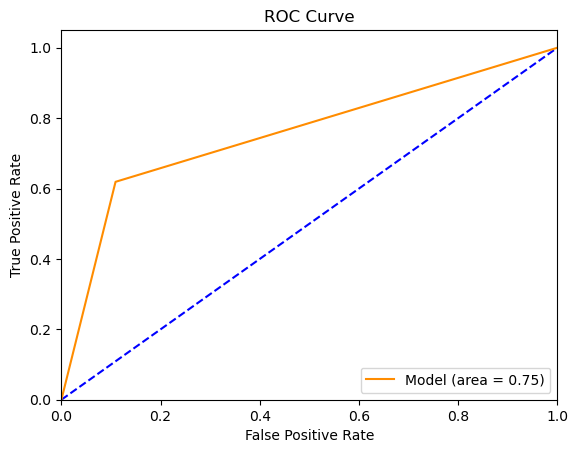

In [17]:
def plot_roc_curve (model,X_test,y_test):
  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
  #Setting the graph area
  plt.figure()
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])

  #Plotting the worst line possiple
  plt.plot([0, 1], [0, 1],'b--')

  #Plotting the logistic regression we have built
  plt.plot(fpr, tpr, color='darkorange', label='Model (area = %0.2f)' % logit_roc_auc)

  #Adding labels and etc
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

plot_roc_curve (dectree,X_test,y_test)

###### confusion matrix

In [18]:
def find_confusion_matrix(y_test,y_pred):
  confusion_mat = confusion_matrix(y_test, y_pred)
  print(confusion_mat)

  tn, fp, fn, tp = confusion_mat.ravel()
  print('TN: %0.2f'% tn)
  print('TP: %0.2f'% tp)
  print('FP: %0.2f'%fp)
  print('FN: %0.2f'%fn)

find_confusion_matrix(y_test,y_pred)

[[457  56]
 [ 24  39]]
TN: 457.00
TP: 39.00
FP: 56.00
FN: 24.00


###### plot model

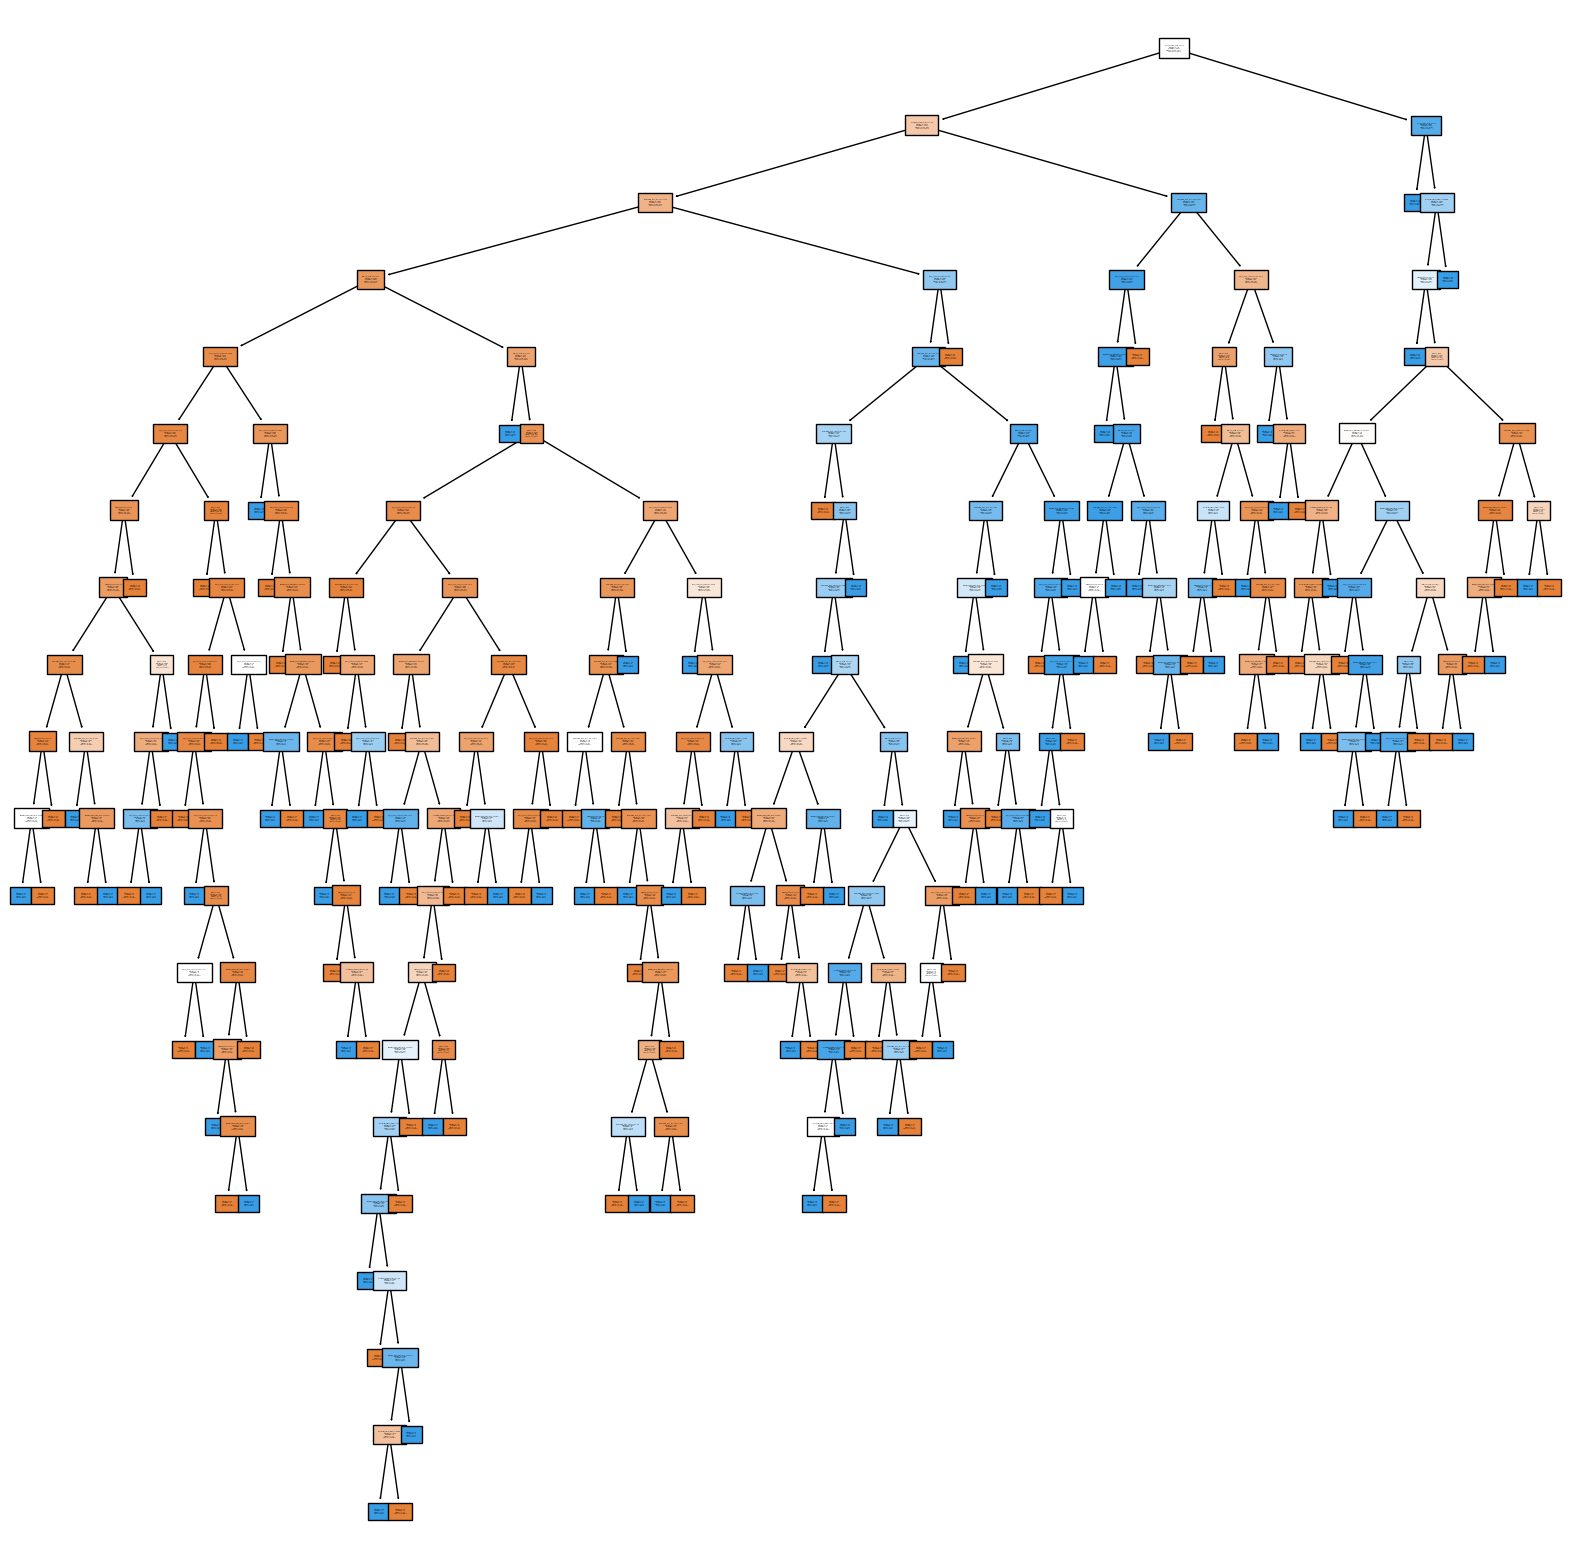

In [19]:
def plot_model(model,class_names,max_depth=None,figsize=(20,20),fontsize=1):
    plt.figure(figsize=figsize)
    tree.plot_tree(dectree
                   ,feature_names = dectree.feature_names_in_
                   ,fontsize=fontsize
                   ,max_depth = max_depth
                   ,class_names=class_names
                   ,filled = True);
    
plot_model(dectree,['not churn','churn'])

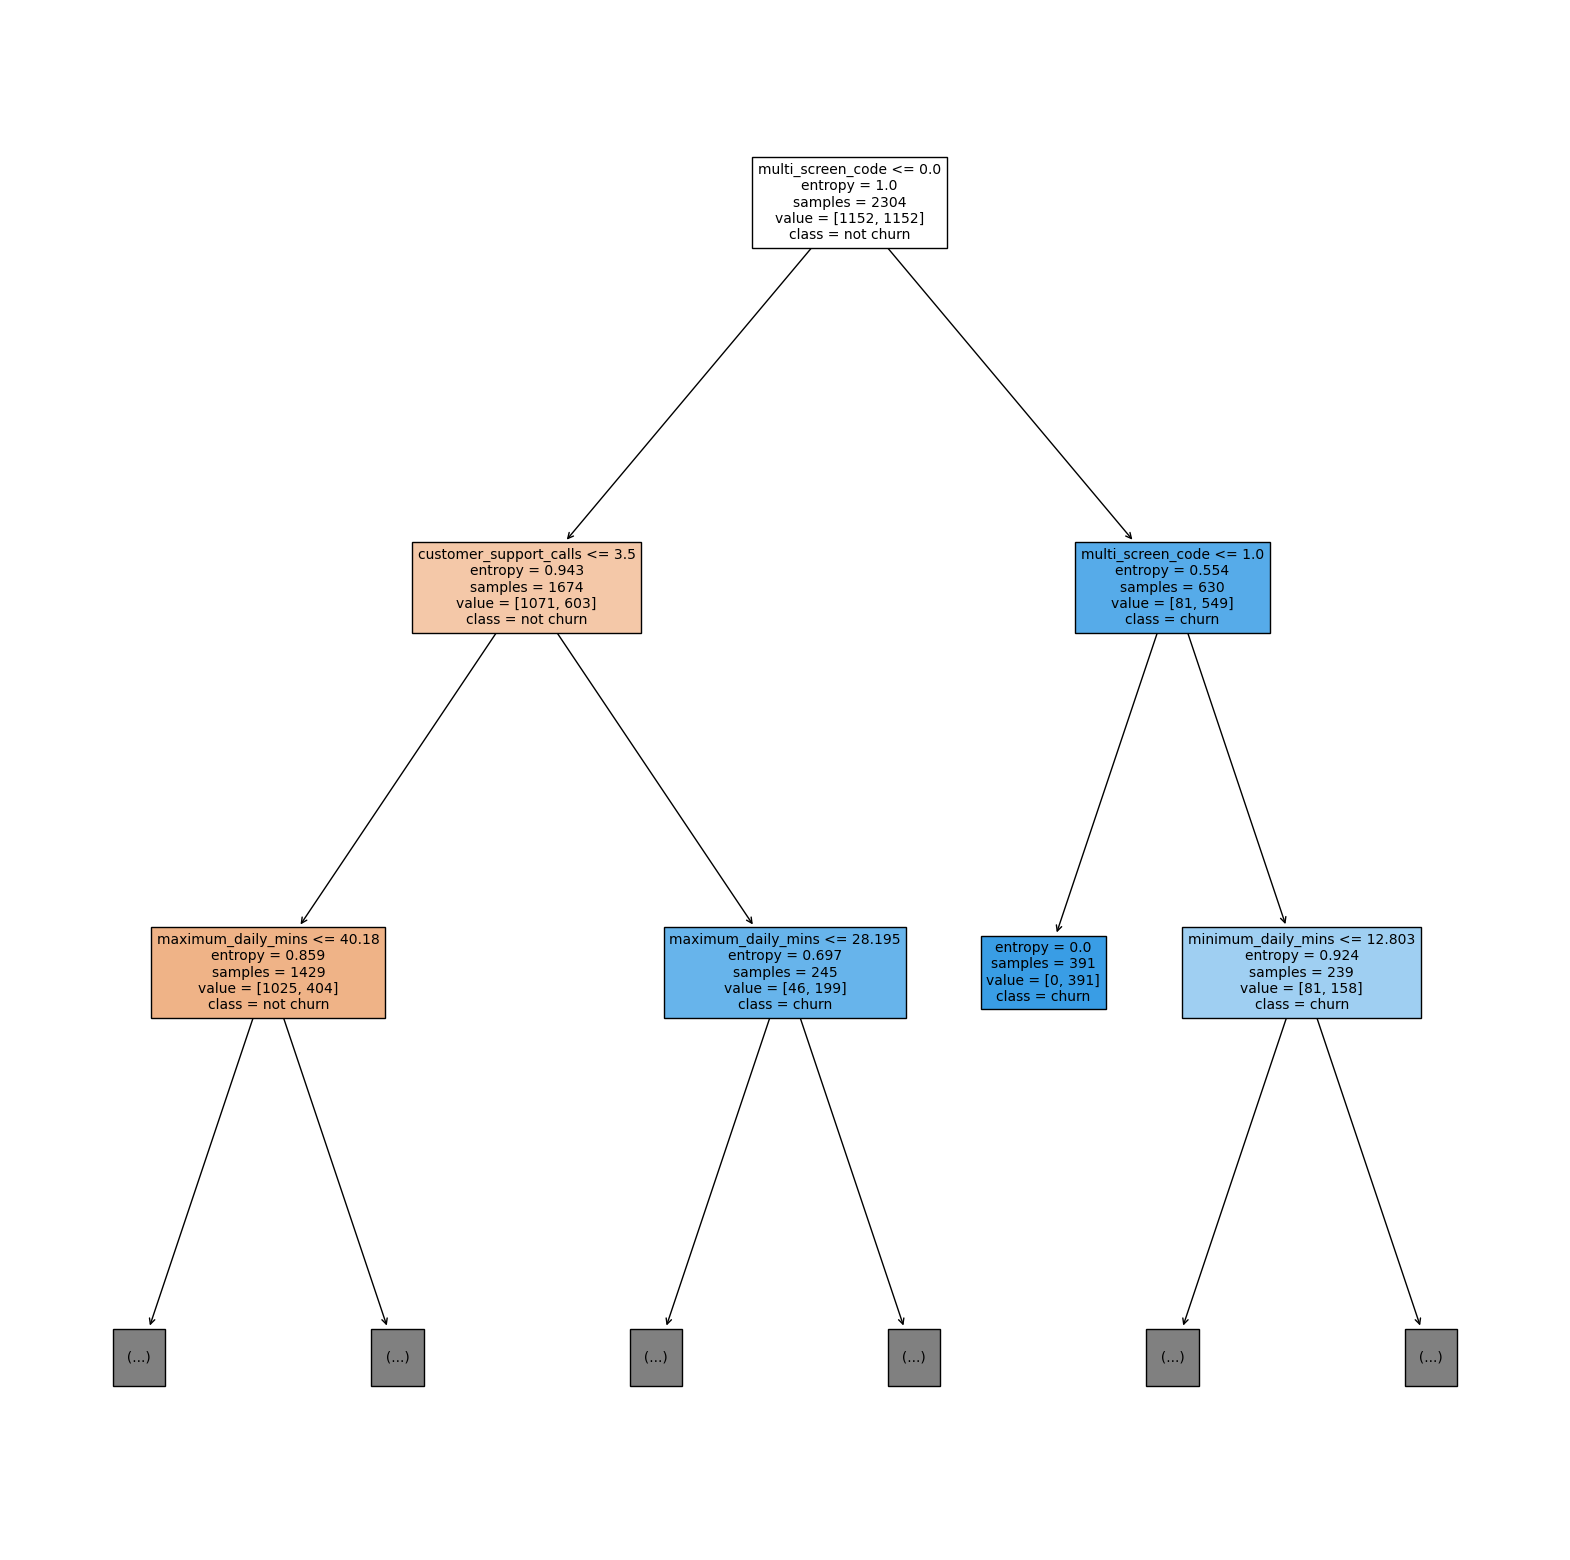

In [20]:
plot_model(dectree,['not churn','churn'],max_depth = 2,figsize=(20,20),fontsize=10)

In [21]:
def read_tree(model):
  n_nodes = model.tree_.node_count
  children_left = model.tree_.children_left
  children_right = model.tree_.children_right
  feature = model.tree_.feature
  feature_names = model.feature_names_in_
  threshold = model.tree_.threshold

  node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
  is_leaves = np.zeros(shape=n_nodes, dtype=bool)
  stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
  while len(stack) > 0:
      # `pop` ensures each node is only visited once
      node_id, depth = stack.pop()
      node_depth[node_id] = depth

      # If the left and right child of a node is not the same we have a split
      # node
      is_split_node = children_left[node_id] != children_right[node_id]
      # If a split node, append left and right children and depth to `stack`
      # so we can loop through them
      if is_split_node:
          stack.append((children_left[node_id], depth + 1))
          stack.append((children_right[node_id], depth + 1))
      else:
          is_leaves[node_id] = True

  print(
      "The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes)
  )
  for i in range(n_nodes):
      if is_leaves[i]:
          print(
              "{space}node={node} is a leaf node.".format(
                  space=node_depth[i] * "\t", node=i
              )
          )
      else:
          print(
              "{space}node={node} is a split node: "
              "go to node {left} if {feature} <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature_names[feature[i]],
                  threshold=round(threshold[i],0),
                  right=children_right[i],
              )
          )
            
read_tree(dectree)

The binary tree structure has 305 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if multi_screen_code <= 0.0 else to node 264.
	node=1 is a split node: go to node 2 if customer_support_calls <= 4.0 else to node 225.
		node=2 is a split node: go to node 3 if maximum_daily_mins <= 40.0 else to node 154.
			node=3 is a split node: go to node 4 if gender_code <= 0.0 else to node 69.
				node=4 is a split node: go to node 5 if mail_subscribed_code <= 0.0 else to node 50.
					node=5 is a split node: go to node 6 if no_of_days_subscribed <= 74.0 else to node 27.
						node=6 is a split node: go to node 7 if videos_watched <= 6.0 else to node 26.
							node=7 is a split node: go to node 8 if videos_watched <= 4.0 else to node 19.
								node=8 is a split node: go to node 9 if maximum_daily_mins <= 36.0 else to node 14.
									node=9 is a split node: go to node 10 if videos_watched <= 2.0 else to node 13.
										node=10 is a split node: go to node 11 i

###### Feature Importance

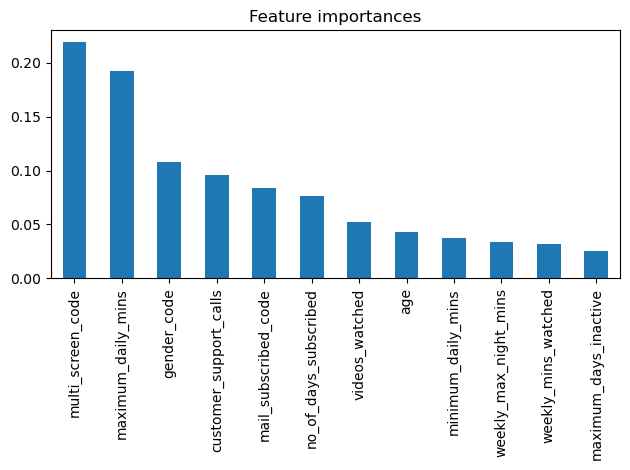

In [22]:
def plot_feature_importances(model):
  feature_importances = pd.Series(model.feature_importances_, index=model.feature_names_in_)
  feature_importances = feature_importances.sort_values(axis=0, ascending=False)
  fig, ax = plt.subplots()
  feature_importances.plot.bar()
  ax.set_title("Feature importances")
  fig.tight_layout()
    
plot_feature_importances(dectree)